In [1]:
from puzzlesolver.puzzles import Hanoi
from puzzlesolver.solvers import GSolver, SQLSolver, ISolver, PSolver

import time

In [2]:
variants = ["3_%i" % i for i in range(1, 11)]
pos_num = [Hanoi.generateStartPosition(variantid=variant).numPositions for variant in variants]

In [3]:
def timeit(solve_cls, dir_path="/tmp/puzzles/"):
    arr_handle = []
    for variant in variants:
        print("Solving variant: %s " % variant, end="")
        start = time.time()
        puzzle = Hanoi.generateStartPosition(variant)
        if dir_path:
            solver = solve_cls(puzzle, dir_path=dir_path)
        else:
            solver = solve_cls(puzzle)
        solver.solve()
        length = time.time() - start
        arr_handle.append(length)
        print("Took %f seconds" % length)
    print("Done")
    return arr_handle

In [4]:
print("General")
general = timeit(GSolver, None)
print("SQL")
sql = timeit(SQLSolver)
print("Index")
index = timeit(ISolver)
print("Pickle")
pickle = timeit(PSolver)

General
Solving variant: 3_1 Took 0.000203 seconds
Solving variant: 3_2 Took 0.000302 seconds
Solving variant: 3_3 Took 0.000944 seconds
Solving variant: 3_4 Took 0.002306 seconds
Solving variant: 3_5 Took 0.010020 seconds
Solving variant: 3_6 Took 0.024185 seconds
Solving variant: 3_7 Took 0.070002 seconds
Solving variant: 3_8 Took 0.229855 seconds
Solving variant: 3_9 Took 0.771318 seconds
Solving variant: 3_10 Took 2.243298 seconds
Done
SQL
Solving variant: 3_1 Took 0.009175 seconds
Solving variant: 3_2 Took 0.016069 seconds
Solving variant: 3_3 Took 0.036004 seconds
Solving variant: 3_4 Took 0.089279 seconds
Solving variant: 3_5 Took 0.242762 seconds
Solving variant: 3_6 Took 0.778639 seconds
Solving variant: 3_7 Took 2.141282 seconds
Solving variant: 3_8 Took 6.475260 seconds
Solving variant: 3_9 Took 23.215360 seconds
Solving variant: 3_10 Took 78.500533 seconds
Done
Index
Solving variant: 3_1 Took 0.002244 seconds
Solving variant: 3_2 Took 0.001181 seconds
Solving variant: 3_3 T

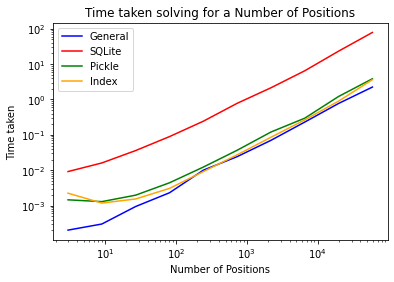

In [24]:
import matplotlib.pyplot as plt
plt.loglog(pos_num, general, label="General", color="blue")
plt.loglog(pos_num, sql, label="SQLite", color="red")
plt.loglog(pos_num, pickle, label="Pickle", color="green")
plt.loglog(pos_num, index, label="Index", color="orange")
plt.xlabel("Number of Positions")
plt.ylabel("Time Taken")
plt.title("Time Taken solving for a Number of Positions")
plt.legend();

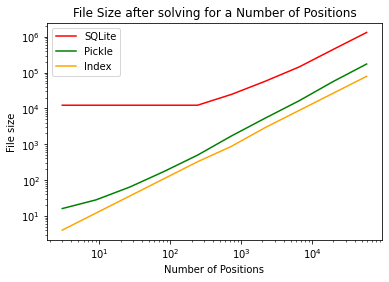

In [25]:
pickle_size = [16, 28, 64, 172, 496, 1698, 5345, 16284, 55662, 173800]
index_size = [4, 12, 36, 108, 324, 872, 2916, 8748, 26244, 78732]
sql_size = [12288, 12288, 12288, 12288, 12288, 24576, 57344, 143360, 438272, 1323008]

import matplotlib.pyplot as plt
plt.loglog(pos_num, sql_size, label="SQLite", color="red")
plt.loglog(pos_num, pickle_size, label="Pickle", color="green")
plt.loglog(pos_num, index_size, label="Index", color="orange")
plt.xlabel("Number of Positions")
plt.ylabel("File size")
plt.title("File Size after solving for a Number of Positions")
plt.legend();